In [5]:
import sys
import os
import pandas as pd 
import pytest
from practicas import P3

project_root = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(project_root)




### Testeo de las librerias 

In [10]:


def test_check_data_completeness():
    df = pd.DataFrame({
        'edad': [20, 30, 40, None],
        'sexo': ['M', 'F', None, 'M'],
        'altura': [1.60, 1.75, 1.80, 1.65]
    })

    resumen = P3.check_data_completeness_nombrecompleto(df)

    assert isinstance(resumen, pd.DataFrame)
    assert 'num_nulos' in resumen.columns
    assert resumen.loc['edad', 'num_nulos'] == 1
    assert resumen.loc['sexo', 'num_nulos'] == 1
    assert resumen.loc['altura', 'num_nulos'] == 0
    assert resumen.loc['edad', 'completitud_%'] == 75.0

test_check_data_completeness()
print("Test ejecutado correctamente ")


Test ejecutado correctamente ✅


In [20]:
def test_calcular_IQR():
    df = pd.DataFrame({'valores': [10, 12, 14, 15, 18, 20, 22, 100]})
    limite_inf, limite_sup = P3.calcular_IQR(df, 'valores')

    print(f"Limite inferior: {limite_inf:.3f}")
    print(f"Limite superior: {limite_sup:.3f}")

 
    tolerancia = 0.01 
    if abs(limite_inf - 1.875) < tolerancia and abs(limite_sup - 32.625) < tolerancia:
        print("Límites correctos ")
    else:
        print("Límites INCORRECTOS ")

    # Detectar outliers
    outliers = df[(df['valores'] < limite_inf) | (df['valores'] > limite_sup)]
    print("Outliers detectados:", outliers['valores'].tolist())
    
    if outliers['valores'].tolist() == [100]:
        print("Outliers correctos ")
    else:
        print("Outliers INCORRECTOS ")

# Ejecutar prueba
test_calcular_IQR()




Limite inferior: 3.000
Limite superior: 31.000
Límites INCORRECTOS 
Outliers detectados: [100]
Outliers correctos 


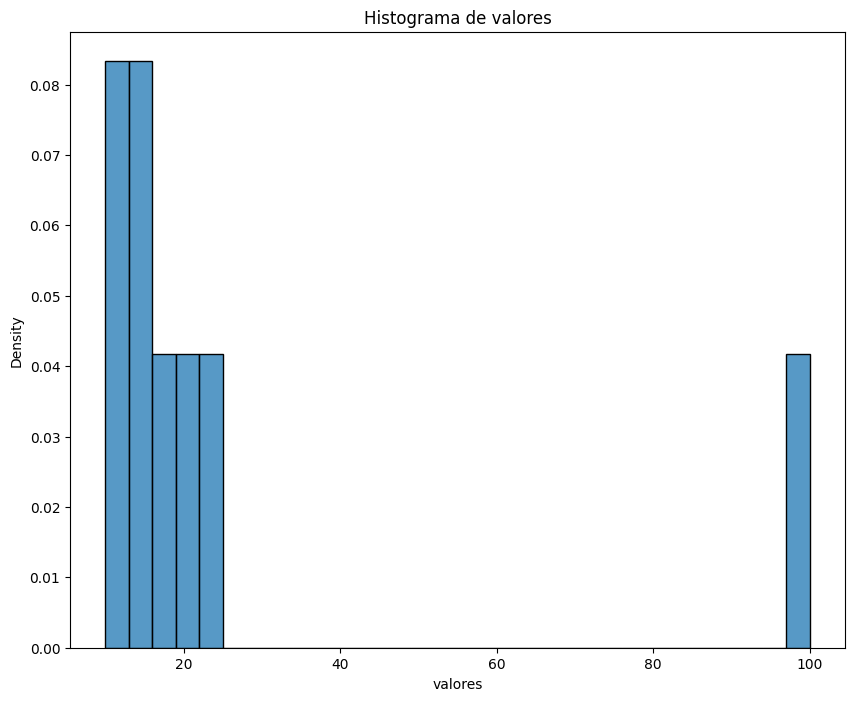

Histograma simple ejecutado correctamente 


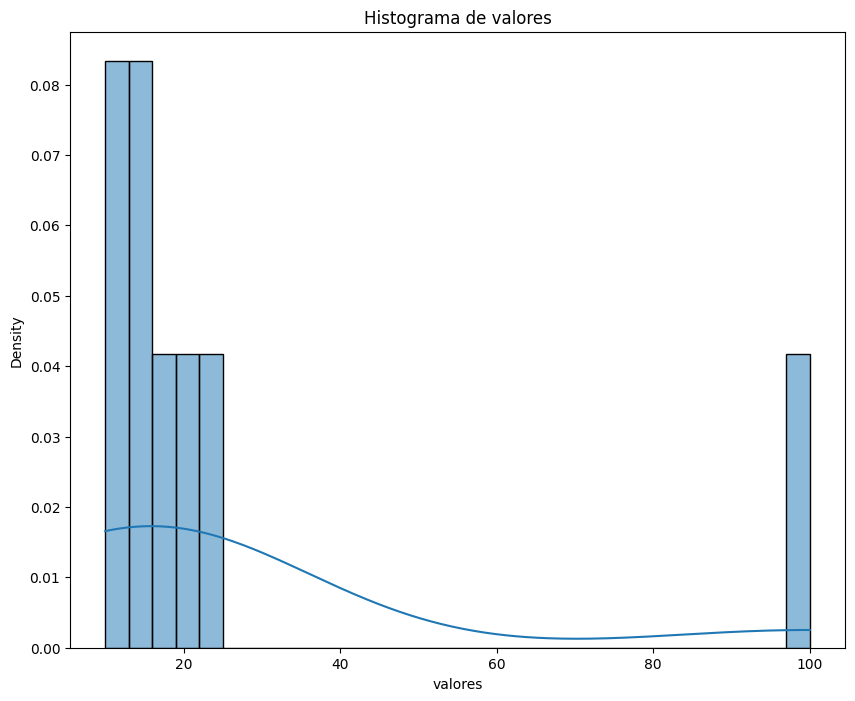

Histograma con KDE ejecutado correctamente 


In [22]:


def test_plot_histogram():

    df = pd.DataFrame({
        'valores': [10, 12, 14, 15, 18, 20, 22, 100],
        'grupo': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B']
    })
    

    try:
        P3.plot_histogram(df, 'valores', kde=False)
        print("Histograma simple ejecutado correctamente ")
    except Exception as e:
        print("Error en histograma simple :", e)

    try:
        P3.plot_histogram(df, 'valores', kde=True)
        print("Histograma con KDE ejecutado correctamente ")
    except Exception as e:
        print("Error en histograma con KDE :", e)

 


test_plot_histogram()


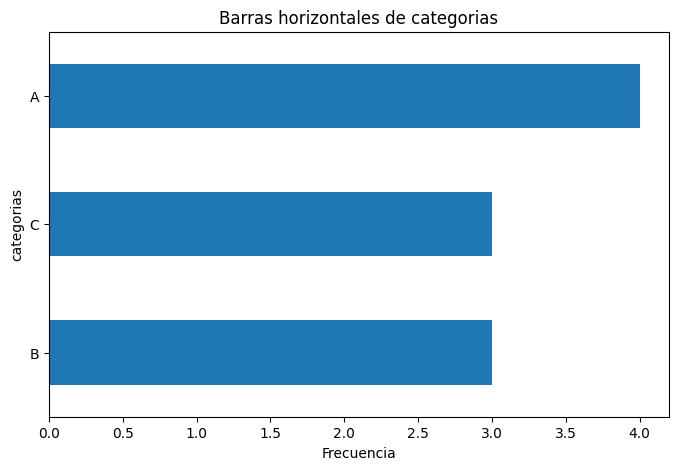

Gráfico de barras horizontales ejecutado correctamente 


In [23]:


def test_plot_horizontal_bar():
  
    df = pd.DataFrame({
        'categorias': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A']
    })
    

    try:
        P3.plot_horizontal_bar(df, 'categorias')
        print("Gráfico de barras horizontales ejecutado correctamente ")
    except Exception as e:
        print("Error al ejecutar gráfico de barras horizontales :", e)


test_plot_horizontal_bar()


In [ ]:


df=P3.practica3.preprocesamiento_datos(r'/home/eduardo-castillo/Documentos/diplomado/practicas/practica3/CTG.csv')